In [ ]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.circuit import Delay, ClassicalRegister

from azure.quantum import Workspace 
from azure.quantum.qiskit import AzureQuantumProvider

import sys
import os

sys.path.append(os.path.abspath("..\\..\\..\\.."))
from objects.shor_code_circuit import ShorCodeCircuit
from functions import *

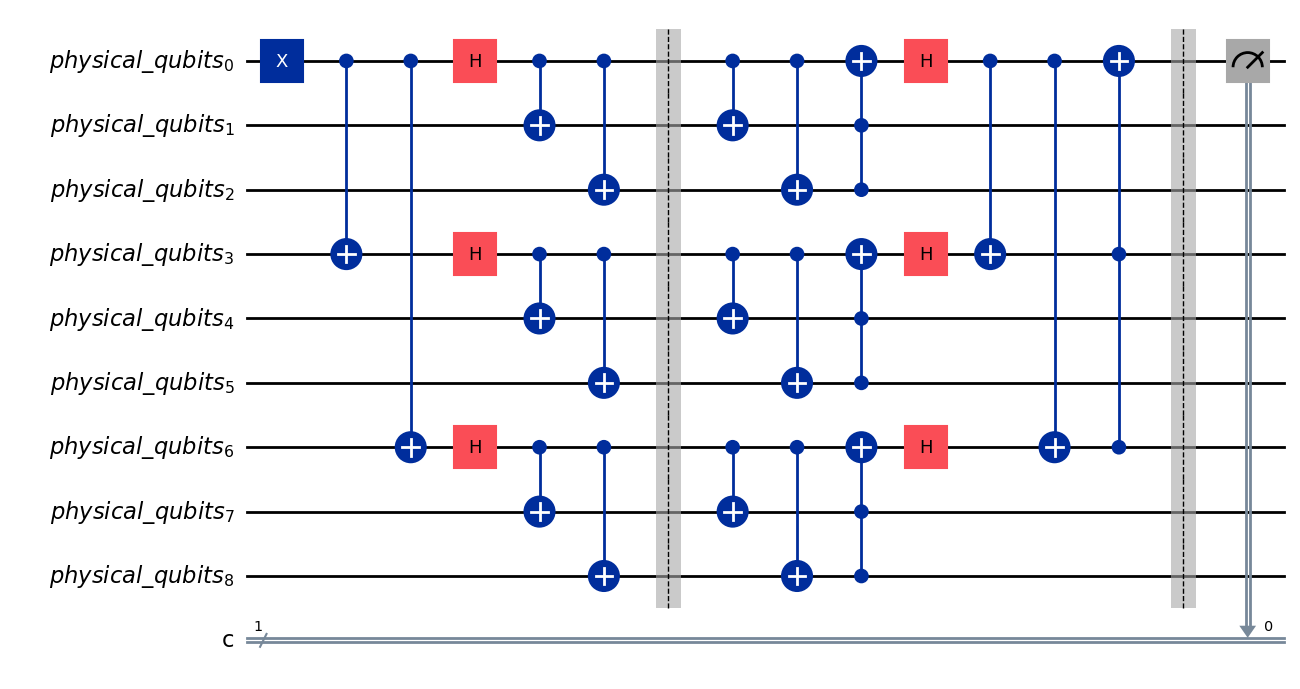

In [ ]:
def load_circuit(initial_state='0'):
    
    qc = ShorCodeCircuit(1)

    if initial_state == '1':
        qc.physical_quantum_circuit.x(0)
    elif initial_state == '+':
        qc.physical_quantum_circuit.h(0)
    elif initial_state == '-':
        qc.physical_quantum_circuit.h(0)
        qc.physical_quantum_circuit.x(0)
    else:
        pass

    qc.encode()

    qc.barrier()

    qc.decode()

    if initial_state in ['+', '-']:
        qc.physical_quantum_circuit.h(0)

    qc.barrier()

    circuit = qc.physical_quantum_circuit
    creg = ClassicalRegister(1, 'c')
    circuit.add_register(creg)
    circuit.measure(circuit.qubits[0], creg)

    return qc

qc = load_circuit(initial_state='1')
qc.draw_physical_circuit('mpl')

In [31]:
# IonQ access
workspace = Workspace(  
    resource_id = "", # Add the resourceID of your workspace
    location = "" # Add the location of your workspace (for example "westus")
    )

provider = AzureQuantumProvider(workspace)

In [32]:
backend_name = "ionq.qpu.aria-1"
backend_name_simulator = "ionq.simulator"
backend = provider.get_backend(backend_name)
simulator_backend = provider.get_backend(backend_name_simulator)

option_params = {
    "error-mitigation": {
        "debias": False,
        "sharpen": False
    }
}

backend.options.update_options(**option_params)
simulator_backend.options.update_options(**option_params)
simulator_backend.options.update_options(noise_model="aria-1") 


Circuit Depth: 14


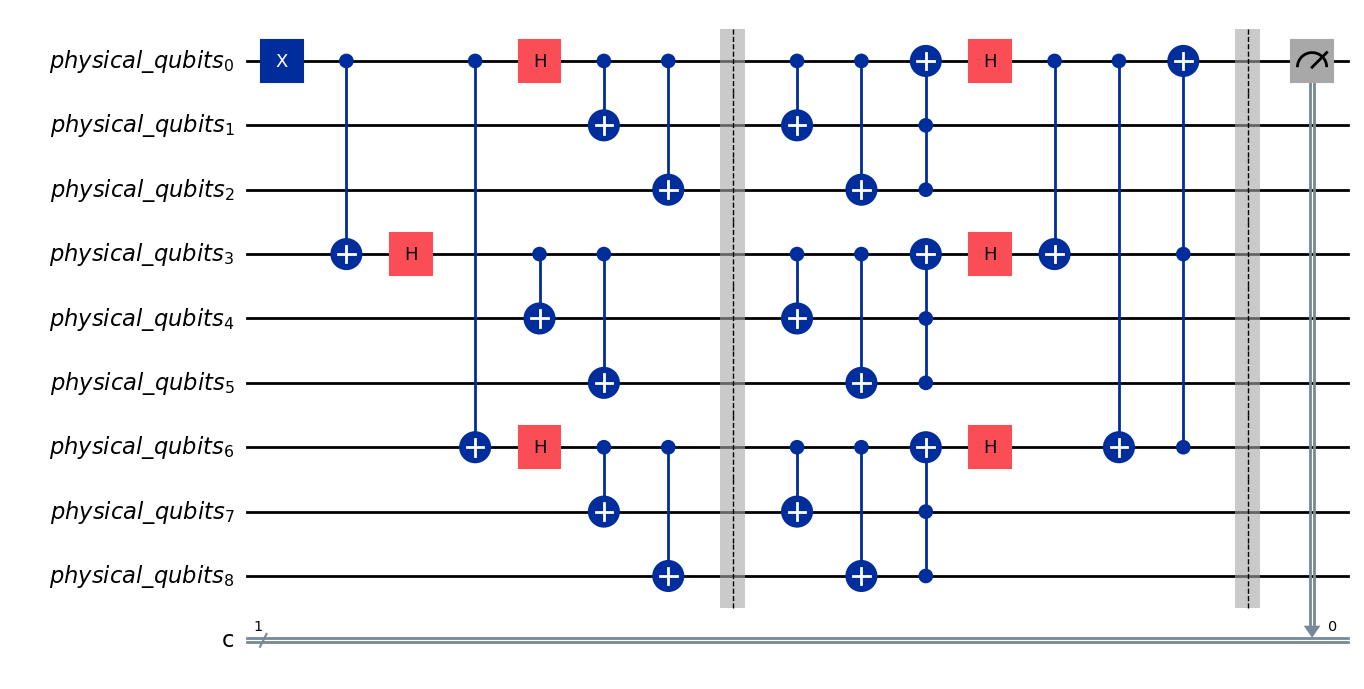

In [33]:

phy_qc = qc.physical_quantum_circuit
isa_circuit = transpile(phy_qc, backend, optimization_level=3)
print(f"Circuit Depth: {isa_circuit.depth()}")
isa_circuit.draw('mpl')

In [34]:
shots = 2000

simulation_result = sampler_simulation(qc.physical_quantum_circuit, shots)

print(f"{simulation_result.data['c'].get_counts()}")

{'1': 2000}


Run experiment

In [ ]:
# job = backend.run(isa_circuit, shots=shots)

# job_id = job.id()
# print(f"Job ID: {job_id}")

Job ID: 20f633e2-fb79-11ef-9276-3800255d459d


In [43]:
json_files = ['shor_encode&decode0.json', 'shor_encode&decode+.json', 'shor_encode&decode1.json']

In [44]:
for file in json_files:
    results = extract_results_json_IONQ(file, type='percentage', reverse_order=True)

    results = results[0]
    print(results)
    print('Similarity:', max(results.values()), '%')
    print('\n')

{'0': 98.8, '1': 1.2}
Similarity: 98.8 %


{'0': 93.30000000000001, '1': 6.7}
Similarity: 93.30000000000001 %


{'0': 2.1999999999999997, '1': 97.8}
Similarity: 97.8 %


